Data Cleaning

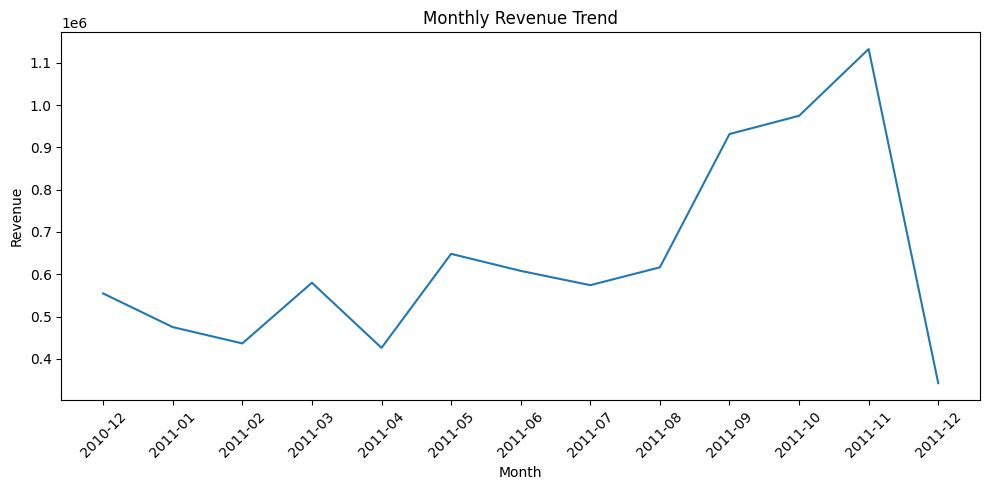

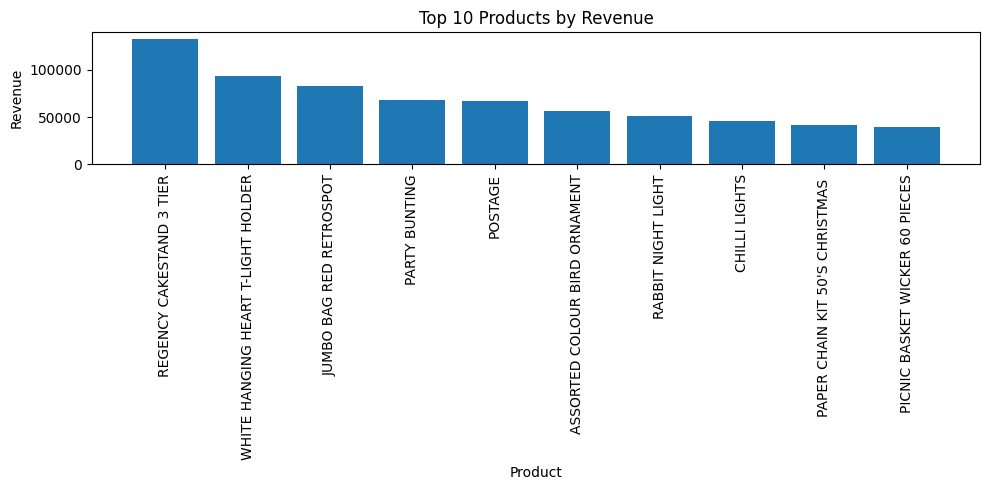

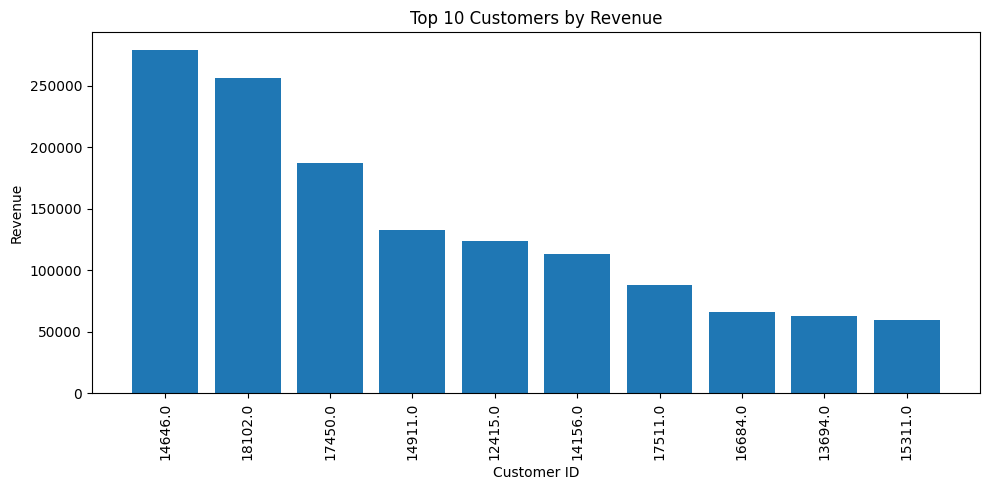

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# locate CSV file
filename = "UK_Ecommerce.csv"
found = next(Path.cwd().rglob(filename), None)
if found is None:
    proj_dir = Path(r"(E-Commerce Sales Analytics)")
    if (proj_dir / filename).exists():
        found = proj_dir / filename

if found is None:
    raise FileNotFoundError(f"{filename} not found. Place it in {Path.cwd()} or {proj_dir}, or update the path.")

# read and coerce types
df = pd.read_csv(found, encoding="ISO-8859-1", low_memory=False)
df["Quantity"] = pd.to_numeric(df.get("Quantity"), errors="coerce").fillna(0)
df["UnitPrice"] = pd.to_numeric(df.get("UnitPrice"), errors="coerce").fillna(0)
df["InvoiceDate"] = pd.to_datetime(df.get("InvoiceDate"), errors="coerce")

# drop rows missing critical fields
df = df.dropna(subset=["CustomerID", "Description", "InvoiceDate"])

# calculations
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]
df["Month"] = df["InvoiceDate"].dt.to_period("M").astype(str)

monthly_revenue = df.groupby("Month")["TotalSales"].sum().sort_index()
top_products = df.groupby("Description")["TotalSales"].sum().sort_values(ascending=False).head(10)
top_customers = df.groupby("CustomerID")["TotalSales"].sum().sort_values(ascending=False).head(10)

# charts
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(top_products.index.astype(str), top_products.values)
plt.xticks(rotation=90)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(top_customers.index.astype(str), top_customers.values)
plt.xticks(rotation=90)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

df.head()